# Modelo de Classificação de Depressão em Áreas Rurais

- Dataset para o desenvolvemento pego na plataforma [Kaggle](https://www.kaggle.com/datasets/diegobabativa/depression).


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import roc_curve, auc
# %matplotlib inline


# Lendo o Dataset

In [2]:

URL = 'https://gist.githubusercontent.com/Ronildo22/a8983b7543c364534c75d6add6fc8413/raw/767bec26dbf90a2467380aba7d6f71a0820bc37e/depressionDataset'
df_depressao = pd.read_csv(URL)

df_depressao.shape


(1429, 23)

## Renomeando o cabeçalho do Dataframe

In [3]:

rename_df = {
            'Survey_id': 'id_pesquisa',
            'Ville_id': 'id_cidade',
            'sex': 'genero',
            'Age': 'idade',
            'Married': 'casado',
            'Number_children': 'numero_filhos',
            'education_level': 'nivel_educacao',
            'total_members': 'membros_familia',
            'gained_asset': 'ativos_adquiridos',
            'durable_asset': 'ativos_duraveis',
            'save_asset': 'ativos_poupados',
            'living_expenses': 'despesas_moradia',
            'other_expenses': 'outras_despesas',
            'incoming_salary': 'renda_salario',
            'incoming_own_farm': 'renda_fazenda_propria',
            'incoming_business': 'renda_negocios',
            'incoming_no_business': 'renda_sem_negocio',
            'incoming_agricultural': 'renda_agricola',
            'farm_expenses': 'despesas_fazenda',
            'labor_primary': 'trabalho_principal',
            'lasting_investment': 'investimento_duradouro',
            'no_lasting_investmen': 'sem_investimento_duradouro',
            'depressed': 'depressao'
            }

df_depressao.rename(columns=rename_df, inplace=True)
df_depressao.columns


Index(['id_pesquisa', 'id_cidade', 'genero', 'idade', 'casado',
       'numero_filhos', 'nivel_educacao', 'membros_familia',
       'ativos_adquiridos', 'ativos_duraveis', 'ativos_poupados',
       'despesas_moradia', 'outras_despesas', 'renda_salario',
       'renda_fazenda_propria', 'renda_negocios', 'renda_sem_negocio',
       'renda_agricola', 'despesas_fazenda', 'trabalho_principal',
       'investimento_duradouro', 'sem_investimento_duradouro', 'depressao'],
      dtype='object')

## Removendo Colunas Desnecessarias

In [4]:

df_depressao.drop(['id_pesquisa', 'id_cidade'], axis=1, inplace=True)

df_depressao.columns


Index(['genero', 'idade', 'casado', 'numero_filhos', 'nivel_educacao',
       'membros_familia', 'ativos_adquiridos', 'ativos_duraveis',
       'ativos_poupados', 'despesas_moradia', 'outras_despesas',
       'renda_salario', 'renda_fazenda_propria', 'renda_negocios',
       'renda_sem_negocio', 'renda_agricola', 'despesas_fazenda',
       'trabalho_principal', 'investimento_duradouro',
       'sem_investimento_duradouro', 'depressao'],
      dtype='object')

## Removendo Valores Vazios do Dataframe

In [5]:
df_depressao = df_depressao.dropna()

df_depressao.count()

genero                        1409
idade                         1409
casado                        1409
numero_filhos                 1409
nivel_educacao                1409
membros_familia               1409
ativos_adquiridos             1409
ativos_duraveis               1409
ativos_poupados               1409
despesas_moradia              1409
outras_despesas               1409
renda_salario                 1409
renda_fazenda_propria         1409
renda_negocios                1409
renda_sem_negocio             1409
renda_agricola                1409
despesas_fazenda              1409
trabalho_principal            1409
investimento_duradouro        1409
sem_investimento_duradouro    1409
depressao                     1409
dtype: int64

## Removendo Dados Enviesados do Dataframe


In [6]:

filtro = (
    (df_depressao['casado'] != 0) &
    (df_depressao['genero'] != 0) &
    (df_depressao['renda_salario'] != 1) &
    (df_depressao['renda_fazenda_propria'] != 1) &
    (df_depressao['renda_negocios'] != 1) &
    (df_depressao['renda_sem_negocio'] != 1) &
    (df_depressao['trabalho_principal'] != 1) &
    (df_depressao['depressao'] == 0)
)

linhas_a_serem_removidas = df_depressao[filtro]
df_depressao.drop(linhas_a_serem_removidas.index, inplace=True)

# RESENTANDO O INDICE DO DATAFRAME
df_depressao.reset_index(drop=True, inplace=True)

# VALOR ABSOLUTO QUE CADA COLUNA TEM QUE TER 
valor_absoluto = 230

### Removendo vies na coluna 'casado'

In [7]:
cl_casado = df_depressao['casado']

lista_index_casado = []

cl_casado_value_0 = cl_casado.value_counts()[0]
cl_casado_value_1 = cl_casado.value_counts()[1]
quant_vies_remover = (cl_casado_value_1 - cl_casado_value_0) - 1

cl_casado.reset_index(drop=True, inplace=True)

i = 0
for index, valor in enumerate(cl_casado):

    if valor == 1 and i <= quant_vies_remover:

        lista_index_casado.append(index)
        cl_casado.drop(index=[index], inplace=True)
        i += 1

valor_atual = cl_casado.count()

quatidade_remover = valor_atual - valor_absoluto
quatidade_remover = quatidade_remover / 2

linhas_a_serem_removidas = cl_casado[cl_casado == 0].head(int(quatidade_remover))
cl_casado.drop(linhas_a_serem_removidas.index, inplace=True)

linhas_a_serem_removidas = cl_casado[cl_casado == 1].head(int(quatidade_remover))
cl_casado.drop(linhas_a_serem_removidas.index, inplace=True)

print(cl_casado.value_counts())
print(cl_casado.count())


casado
0    115
1    115
Name: count, dtype: int64
230


### Removendo vies na coluna 'genero'

In [8]:
cl_genero = df_depressao['genero']

lista_index_genero = []

cl_genero_value_0 = cl_genero.value_counts()[0]
cl_genero_value_1 = cl_genero.value_counts()[1]
quant_vies_remover = (cl_genero_value_1 - cl_genero_value_0) - 1

i = 0
for index, valor in enumerate(cl_genero):

    if valor == 1 and i <= quant_vies_remover:

        lista_index_genero.append(index)
        cl_genero.drop(index=[index], inplace=True)
        i += 1

print(cl_genero.value_counts())
print(cl_genero.count())

genero
0    115
1    115
Name: count, dtype: int64
230


### Removendo vies da coluna 'renda_salario'

In [9]:

cl_renda_salario = df_depressao['renda_salario']

lista_index_renda_salario = []

cl_renda_salario_value_0 = cl_renda_salario.value_counts()[0]
cl_renda_salario_value_1 = cl_renda_salario.value_counts()[1]
quant_vies_remover = (cl_renda_salario_value_0 - cl_renda_salario_value_1) - 1

i = 0
for index, valor in enumerate(cl_renda_salario):

    if valor == 0 and i <= quant_vies_remover:

        lista_index_renda_salario.append(index)
        cl_renda_salario.drop(index=[index], inplace=True)
        i += 1

valor_atual = cl_renda_salario.count()

quatidade_remover = valor_atual - valor_absoluto
quatidade_remover = quatidade_remover / 2

linhas_a_serem_removidas = cl_renda_salario[cl_renda_salario == 0].head(int(quatidade_remover))
cl_renda_salario.drop(linhas_a_serem_removidas.index, inplace=True)

linhas_a_serem_removidas = cl_renda_salario[cl_renda_salario == 1].head(int(quatidade_remover))
cl_renda_salario.drop(linhas_a_serem_removidas.index, inplace=True)

print(cl_renda_salario.value_counts())
print(cl_renda_salario.count())


renda_salario
1    115
0    115
Name: count, dtype: int64
230


### Removendo vies na coluna 'renda_fazenda_propria'

In [10]:

cl_renda_fazenda_propria = df_depressao['renda_fazenda_propria']

lista_index_renda_fazenda_propria = []

cl_renda_fazenda_propria_value_0 = cl_renda_fazenda_propria.value_counts()[0]
cl_renda_fazenda_propria_value_1 = cl_renda_fazenda_propria.value_counts()[1]

quant_vies_remover = (cl_renda_fazenda_propria_value_0 - cl_renda_fazenda_propria_value_1) - 1

i = 0
for index, valor in enumerate(cl_renda_fazenda_propria):

    if valor == 0 and i <= quant_vies_remover:

        lista_index_renda_fazenda_propria.append(index)
        cl_renda_fazenda_propria.drop(index=[index], inplace=True)
        i += 1

valor_atual = cl_renda_fazenda_propria.count()

quatidade_remover = valor_atual - valor_absoluto
quatidade_remover = quatidade_remover / 2

linhas_a_serem_removidas = cl_renda_fazenda_propria[cl_renda_fazenda_propria == 0].head(int(quatidade_remover))
cl_renda_fazenda_propria.drop(linhas_a_serem_removidas.index, inplace=True)

linhas_a_serem_removidas = cl_renda_fazenda_propria[cl_renda_fazenda_propria == 1].head(int(quatidade_remover))
cl_renda_fazenda_propria.drop(linhas_a_serem_removidas.index, inplace=True)

print(cl_renda_fazenda_propria.value_counts())
print(cl_renda_fazenda_propria.count())


renda_fazenda_propria
1    115
0    115
Name: count, dtype: int64
230


### Removendo vies na coluna 'renda_negocios'

In [11]:

cl_renda_negocios = df_depressao['renda_negocios']

lista_index_renda_negocios = []

cl_renda_negocios_value_0 = cl_renda_negocios.value_counts()[0]
cl_renda_negocios_value_1 = cl_renda_negocios.value_counts()[1]

quant_vies_remover = (cl_renda_negocios_value_0 - cl_renda_negocios_value_1) - 1

i = 0
for index, valor in enumerate(cl_renda_negocios):

    if valor == 0 and i <= quant_vies_remover:

        lista_index_renda_negocios.append(index)
        cl_renda_negocios.drop(index=[index], inplace=True)
        i += 1

valor_atual = cl_renda_negocios.count()

quatidade_remover = valor_atual - valor_absoluto
quatidade_remover = quatidade_remover / 2

linhas_a_serem_removidas = cl_renda_negocios[cl_renda_negocios == 0].head(int(quatidade_remover))
cl_renda_negocios.drop(linhas_a_serem_removidas.index, inplace=True)

linhas_a_serem_removidas = cl_renda_negocios[cl_renda_negocios == 1].head(int(quatidade_remover))
cl_renda_negocios.drop(linhas_a_serem_removidas.index, inplace=True)

print(cl_renda_negocios.value_counts())
print(cl_renda_negocios.count()) 

renda_negocios
1    115
0    115
Name: count, dtype: int64
230


### Removendo vies da coluna 'renda_sem_negocio'

In [12]:

cl_renda_sem_negocio = df_depressao['renda_sem_negocio']

lista_index_renda_sem_negocio = []

cl_renda_sem_negocio_value_0 = cl_renda_sem_negocio.value_counts()[0]
cl_renda_sem_negocio_value_1 = cl_renda_sem_negocio.value_counts()[1]

quant_vies_remover = (cl_renda_sem_negocio_value_0 - cl_renda_sem_negocio_value_1) - 1

i = 0
for index, valor in enumerate(cl_renda_sem_negocio):

    if valor == 0 and i <= quant_vies_remover:

        lista_index_renda_sem_negocio.append(index)
        cl_renda_sem_negocio.drop(index=[index], inplace=True)
        i += 1

print(cl_renda_sem_negocio.value_counts())

valor_atual = cl_renda_sem_negocio.count()

quatidade_remover = valor_atual - valor_absoluto
quatidade_remover = quatidade_remover / 2

linhas_a_serem_removidas = cl_renda_sem_negocio[cl_renda_sem_negocio == 0].head(int(quatidade_remover))
cl_renda_sem_negocio.drop(linhas_a_serem_removidas.index, inplace=True)

linhas_a_serem_removidas = cl_renda_sem_negocio[cl_renda_sem_negocio == 1].head(int(quatidade_remover))
cl_renda_sem_negocio.drop(linhas_a_serem_removidas.index, inplace=True)

print(cl_renda_sem_negocio.value_counts())
print(cl_renda_sem_negocio.count())

renda_sem_negocio
1    372
0    372
Name: count, dtype: int64
renda_sem_negocio
1    115
0    115
Name: count, dtype: int64
230


### Removendo vies na coluna 'trabalho_principal'

In [13]:

cl_trabalho_principal = df_depressao['trabalho_principal']

lista_index_trabalho_principal = []

cl_trabalho_principal_value_0 = cl_trabalho_principal.value_counts()[0]
cl_trabalho_principal_value_1 = cl_trabalho_principal.value_counts()[1]

quant_vies_remover = (cl_trabalho_principal_value_0 - cl_trabalho_principal_value_1) - 1

i = 0
for index, valor in enumerate(cl_trabalho_principal):

    if valor == 0 and i <= quant_vies_remover:

        lista_index_trabalho_principal.append(index)
        cl_trabalho_principal.drop(index=[index], inplace=True)
        i += 1

print(cl_trabalho_principal.value_counts())

valor_atual = cl_trabalho_principal.count()

quatidade_remover = valor_atual - valor_absoluto
quatidade_remover = quatidade_remover / 2

linhas_a_serem_removidas = cl_trabalho_principal[cl_trabalho_principal == 0].head(int(quatidade_remover))
cl_trabalho_principal.drop(linhas_a_serem_removidas.index, inplace=True)

linhas_a_serem_removidas = cl_trabalho_principal[cl_trabalho_principal == 1].head(int(quatidade_remover))
cl_trabalho_principal.drop(linhas_a_serem_removidas.index, inplace=True)

print(cl_trabalho_principal.value_counts())
print(cl_trabalho_principal.count())


trabalho_principal
1    295
0    295
Name: count, dtype: int64
trabalho_principal
1    115
0    115
Name: count, dtype: int64
230


### Removendo vies na coluna 'depressao'

In [14]:

cl_depressao = df_depressao['depressao']

lista_index_depressao = []

cl_depressao_value_0 = cl_depressao.value_counts()[0]
cl_depressao_value_1 = cl_depressao.value_counts()[1]

quant_vies_remover = (cl_depressao_value_0 - cl_depressao_value_1) - 1

i = 0
for index, valor in enumerate(cl_depressao):

    if valor == 0 and i <= quant_vies_remover:

        lista_index_depressao.append(index)
        cl_depressao.drop(index=[index], inplace=True)
        i += 1

print(cl_depressao.value_counts())

valor_atual = cl_depressao.count()

quatidade_remover = valor_atual - valor_absoluto
quatidade_remover = quatidade_remover / 2

linhas_a_serem_removidas = cl_depressao[cl_depressao == 0].head(int(quatidade_remover))
cl_depressao.drop(linhas_a_serem_removidas.index, inplace=True)

linhas_a_serem_removidas = cl_depressao[cl_depressao == 1].head(int(quatidade_remover))
cl_depressao.drop(linhas_a_serem_removidas.index, inplace=True)

print(cl_depressao.value_counts())
print(cl_depressao.count())


depressao
1    235
0    235
Name: count, dtype: int64
depressao
1    115
0    115
Name: count, dtype: int64
230


### Adicionando as mudanças no DataFrame

In [15]:

df_depressao.drop(columns=['casado', 'genero', 'renda_salario', 'renda_fazenda_propria', 'renda_negocios',
                           'renda_sem_negocio', 'trabalho_principal', 'depressao'], inplace=True)

cl_casado = cl_casado.dropna()
cl_casado.reset_index(drop=True, inplace=True)

cl_genero = cl_genero.dropna()
cl_genero.reset_index(drop=True, inplace=True)

cl_renda_salario = cl_renda_salario.dropna()
cl_renda_salario.reset_index(drop=True, inplace=True)

cl_renda_fazenda_propria = cl_renda_fazenda_propria.dropna()
cl_renda_fazenda_propria.reset_index(drop=True, inplace=True)

cl_renda_negocios = cl_renda_negocios.dropna()
cl_renda_negocios.reset_index(drop=True, inplace=True)

cl_renda_sem_negocio = cl_renda_sem_negocio.dropna()
cl_renda_sem_negocio.reset_index(drop=True, inplace=True)

cl_trabalho_principal = cl_trabalho_principal.dropna()
cl_trabalho_principal.reset_index(drop=True, inplace=True)

cl_depressao = cl_depressao.dropna()
cl_depressao.reset_index(drop=True, inplace=True)

df_depressao['casado'] = cl_casado
df_depressao['genero'] = cl_genero
df_depressao['renda_salario'] = cl_renda_salario
df_depressao['renda_fazenda_propria'] = cl_renda_fazenda_propria
df_depressao['renda_negocios'] = cl_renda_negocios
df_depressao['renda_sem_negocio'] = cl_renda_sem_negocio
df_depressao['trabalho_principal'] = cl_trabalho_principal
df_depressao['depressao'] = cl_depressao

df_depressao = df_depressao.dropna()

print(df_depressao.count())

print(df_depressao['casado'].value_counts())
print(df_depressao['genero'].value_counts())
print(df_depressao['renda_salario'].value_counts())
print(df_depressao['renda_fazenda_propria'].value_counts())
print(df_depressao['renda_negocios'].value_counts())
print(df_depressao['renda_sem_negocio'].value_counts())
print(df_depressao['trabalho_principal'].value_counts())
print(df_depressao['depressao'].value_counts())


idade                         230
numero_filhos                 230
nivel_educacao                230
membros_familia               230
ativos_adquiridos             230
ativos_duraveis               230
ativos_poupados               230
despesas_moradia              230
outras_despesas               230
renda_agricola                230
despesas_fazenda              230
investimento_duradouro        230
sem_investimento_duradouro    230
casado                        230
genero                        230
renda_salario                 230
renda_fazenda_propria         230
renda_negocios                230
renda_sem_negocio             230
trabalho_principal            230
depressao                     230
dtype: int64
casado
0.0    115
1.0    115
Name: count, dtype: int64
genero
0.0    115
1.0    115
Name: count, dtype: int64
renda_salario
1.0    115
0.0    115
Name: count, dtype: int64
renda_fazenda_propria
1.0    115
0.0    115
Name: count, dtype: int64
renda_negocios
1.0    115
0.0  

# Preparando Dados

## Separando o rotulo y dos dados x

In [16]:

df_depressao.head()
y = df_depressao['depressao']

df_depressao.drop(['depressao'], axis=1, inplace=True)



y = np.array(y)


# Deixando a feature x em uma faixa inicial de -2 a 4

In [17]:

df_depressao

scaler = StandardScaler()
x = scaler.fit_transform(df_depressao)

print(x.max())
print(x.min())



4.314524602293343
-2.7252601130495178


# Treinando o modelo

## Metricas do modelo com seed = 0

========== Metricas do modelo ==========
Acuracia: 86%
Recall: 79%
Precisao: 92.00%
F1-score: 85.19%
Erro Absoluto Médio (MAE): 0.14
Erro Quadrático Médio (MSE): 0.14
Raiz do Erro Quadrático Médio (RMSE): 0.37


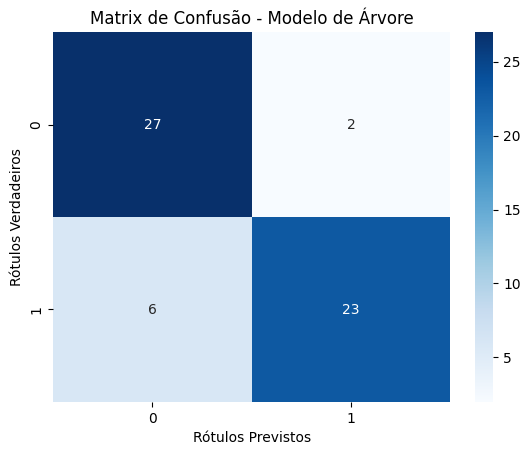

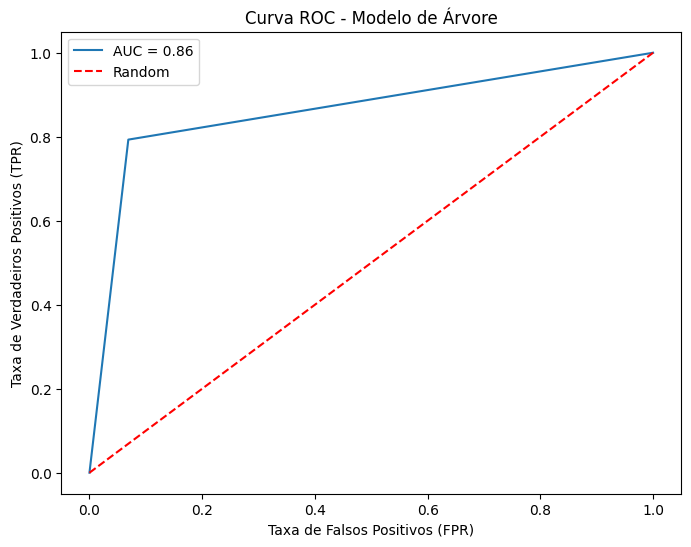

In [18]:

seed = 0

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y, random_state=seed)

arvore = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=seed)
arvore.fit(x_train, y_train)

pred = arvore.predict(x_test)

acuracia = accuracy_score(y_test, pred)
acuracia = acuracia * 100

recall = recall_score(y_test, pred)
recall = recall * 100

precisao = precision_score(y_test, pred)
precisao = precisao * 100

f1 = f1_score(y_test, pred)
f1 = f1 * 100

mae = mean_absolute_error(y_test, pred)

mse = mean_squared_error(y_test, pred)

rmse = np.sqrt(mse)
rmse 


print('========== Metricas do modelo ==========')
print(f'Acuracia: {acuracia:.0f}%')
print(f'Recall: {recall:.0f}%')
print(f'Precisao: {precisao:.2f}%')
print(f'F1-score: {f1:.2f}%')
print(f"Erro Absoluto Médio (MAE): {mae:.2f}",)
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.2f}")


matriz_confusao = confusion_matrix(y_test, pred)
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues')
plt.title('Matrix de Confusão - Modelo de Árvore')
plt.xlabel('Rótulos Previstos')
plt.ylabel('Rótulos Verdadeiros')
plt.show()


fpr, tpr, thresholds = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)
roc_df = pd.DataFrame({'FPR': fpr, 'TPR': tpr})
plt.figure(figsize=(8, 6))
sns.lineplot(data=roc_df, x='FPR', y='TPR', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.title('Curva ROC - Modelo de Árvore')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.legend()
plt.show()


## Modelo Treinado 2000 vezes Sem Seed

C:\Users\Ronildo\AppData\Local\Temp\ipykernel_10284\1791982398.py:45: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scores_accuracy)


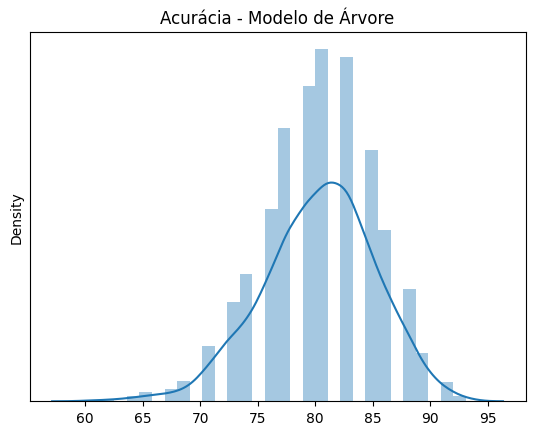

C:\Users\Ronildo\AppData\Local\Temp\ipykernel_10284\1791982398.py:50: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scores_precisao)


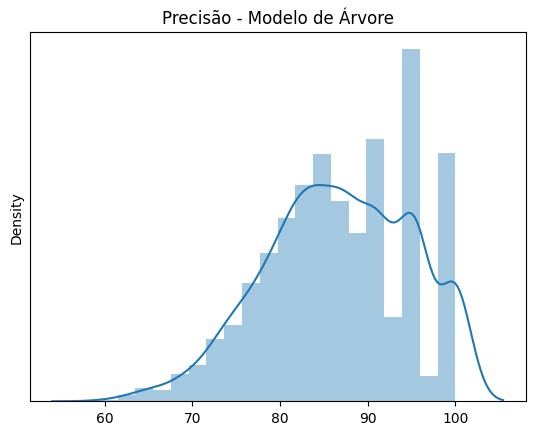

C:\Users\Ronildo\AppData\Local\Temp\ipykernel_10284\1791982398.py:55: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scores_recall)


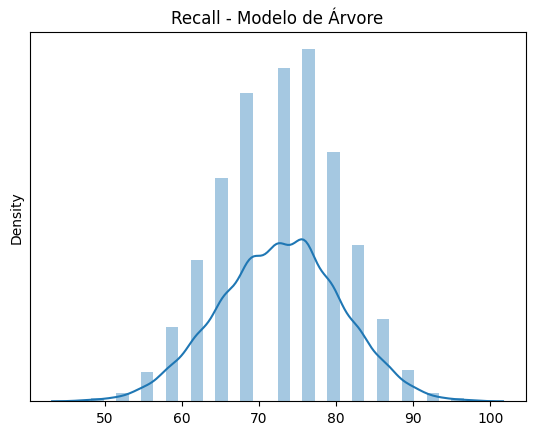

C:\Users\Ronildo\AppData\Local\Temp\ipykernel_10284\1791982398.py:60: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scores_f1)


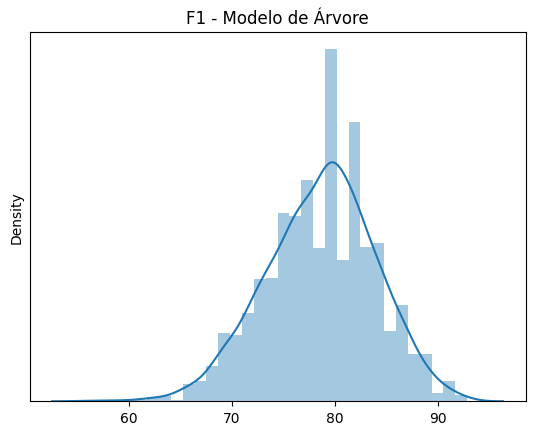

C:\Users\Ronildo\AppData\Local\Temp\ipykernel_10284\1791982398.py:65: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scores_mae)


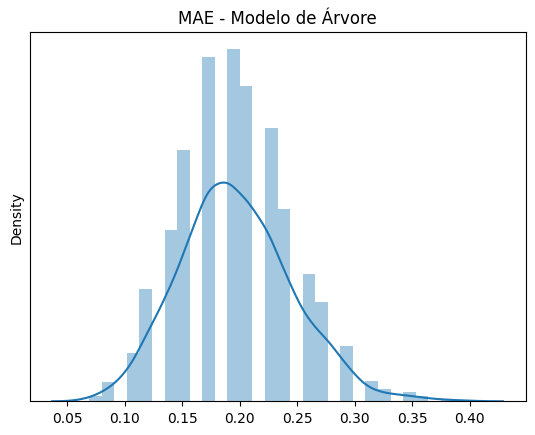

C:\Users\Ronildo\AppData\Local\Temp\ipykernel_10284\1791982398.py:70: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scores_mse)


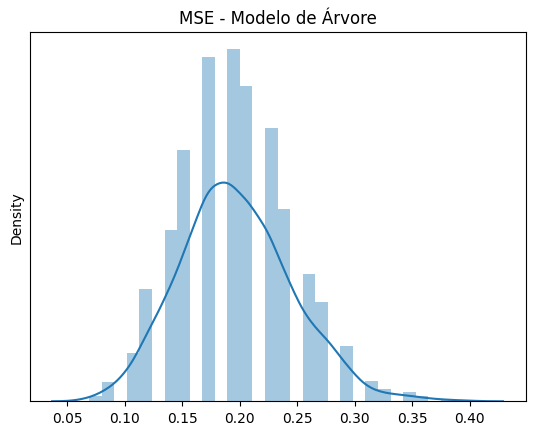

C:\Users\Ronildo\AppData\Local\Temp\ipykernel_10284\1791982398.py:75: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scores_rmse)


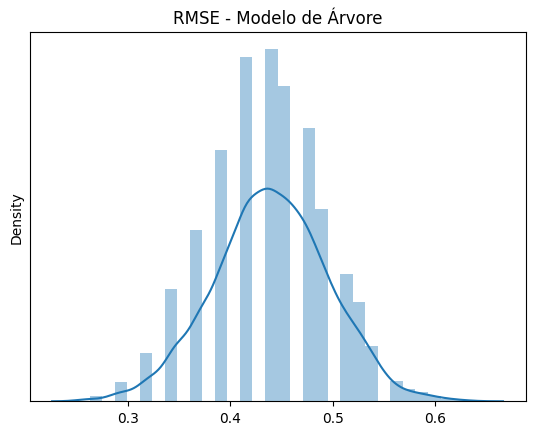

============================== Métricas do Último Treinamento ==============================


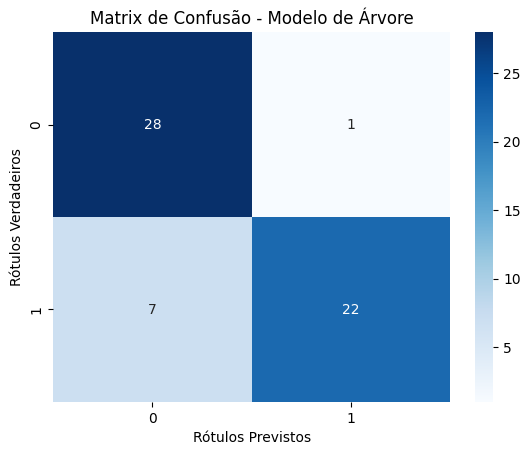

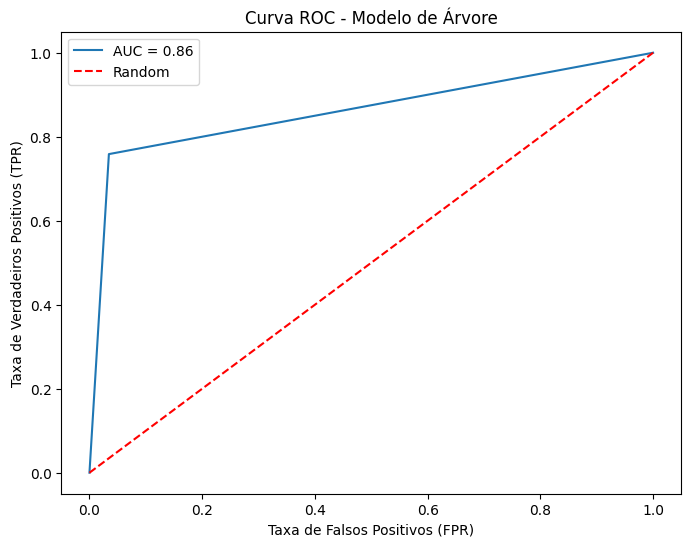

acuracia: 86%
Recall: 76%
Precisao: 96%
F1-score: 85%
Erro Absoluto Médio (MAE): 0.14
Erro Quadrático Médio (MSE): 0.14
Raiz do Erro Quadrático Médio (RMSE): 0.37


In [19]:

scores_accuracy = []
scores_precisao = []
scores_recall = []
scores_f1 = []
scores_mae = []
scores_mse = []
scores_rmse = []


for i in range(2000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y)

    arvore = DecisionTreeClassifier(criterion='entropy', max_depth=3)
    arvore.fit(x_train, y_train)

    pred= arvore.predict(x_test)
    
    acuracia = accuracy_score(y_test, pred)
    acuracia = acuracia * 100
    scores_accuracy.append(acuracia)

    recall = recall_score(y_test, pred)
    recall = recall * 100
    scores_recall.append(recall)

    precisao = precision_score(y_test, pred)
    precisao = precisao * 100
    scores_precisao.append(precisao)

    f1 = f1_score(y_test, pred)
    f1 = f1 * 100
    scores_f1.append(f1)

    mae = mean_absolute_error(y_test, pred)
    scores_mae.append(mae)

    mse = mean_squared_error(y_test, pred)
    scores_mse.append(mse)

    rmse = np.sqrt(mse)
    scores_rmse.append(rmse)



sns.distplot(scores_accuracy)
plt.yticks([])
plt.title("Acurácia - Modelo de Árvore")
plt.show()

sns.distplot(scores_precisao)
plt.yticks([])
plt.title("Precisão - Modelo de Árvore")
plt.show()

sns.distplot(scores_recall)
plt.yticks([])
plt.title("Recall - Modelo de Árvore")
plt.show()

sns.distplot(scores_f1)
plt.yticks([])
plt.title("F1 - Modelo de Árvore")
plt.show()

sns.distplot(scores_mae)
plt.yticks([])
plt.title("MAE - Modelo de Árvore")
plt.show()

sns.distplot(scores_mse)
plt.yticks([])
plt.title("MSE - Modelo de Árvore")
plt.show()

sns.distplot(scores_rmse)
plt.yticks([])
plt.title("RMSE - Modelo de Árvore")
plt.show()

print('============================================================================================')
print('============================== Métricas do Último Treinamento ==============================')
print('============================================================================================')

matriz_confusao = confusion_matrix(y_test, pred)

sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues')
plt.title('Matrix de Confusão - Modelo de Árvore')
plt.xlabel('Rótulos Previstos')
plt.ylabel('Rótulos Verdadeiros')
plt.show()


fpr, tpr, thresholds = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)

roc_df = pd.DataFrame({'FPR': fpr, 'TPR': tpr})

plt.figure(figsize=(8, 6))
sns.lineplot(data=roc_df, x='FPR', y='TPR', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.title('Curva ROC - Modelo de Árvore')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.legend()
plt.show()


print(f'acuracia: {acuracia:.0f}%')
print(f'Recall: {recall:.0f}%')
print(f'Precisao: {precisao:.0f}%')
print(f'F1-score: {f1:.0f}%')
print(f"Erro Absoluto Médio (MAE): {mae:.2f}")
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.2f}")



In [23]:

feature_importance = arvore.feature_importances_
print(feature_importance)


[0.         0.         0.         0.         0.         0.
 0.         0.         0.0799465  0.         0.         0.
 0.03966808 0.         0.4906271  0.         0.         0.20741218
 0.         0.18234613]
